# Probability Assignment

To get full credit in this assignment you need to use `numpy`, `scipy` and `pandas` libraries. Sometimes you need to type equations - type equations in Latex math notation. To produce the plots you can use any plotting library you need.

PS1: We run the assignment through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

PS2: We are also monitoring solution websites and we will take action against anyone that uploads this to a solution website.

## Problem 1 (80 points)

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by  including adequate explanation of the code in either markdown cells or inline to the code.  You can insert as many markdown or code cells you need to perform the analysis.


## Question 1a (10 points)

Write the code for generating the `gs` variable. This is the simplest random variable of the problem and can be generated independent of the others.

1.0


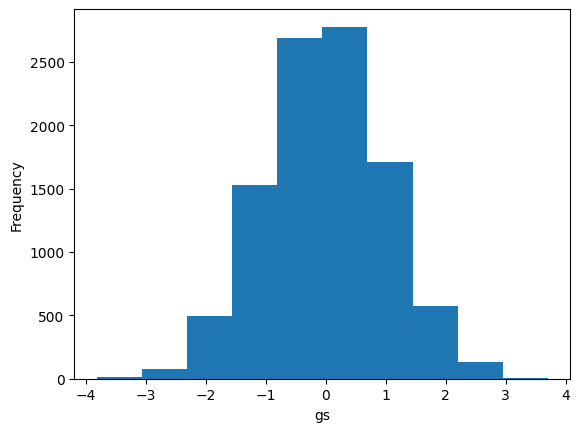

In [34]:
import matplotlib.pyplot as plt
import numpy as mnp
import pandas as mpd
import seaborn as sn
import scipy.stats as sts

Sigma = mnp.array([[1, 0.6, -0.9], [0.6, 1, -0.5], [-0.9, -0.5, 1]])
mean = 0
APT = mnp.random.normal(mean , 1 , 10000)
print(mnp.corrcoef(APT , rowvar = False))

mean = 0
std = 1
gs = mnp.random.normal(mean , std , 10000)
plt.hist(gs , bins = 10)
plt.xlabel('gs')
plt.ylabel('Frequency')
plt.show()

## Question 1b (20 points)

We have three variables, `ak`, `pp`, and `ptime`. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots.



[[ 1.          0.6048432  -0.90063772]
 [ 0.6048432   1.         -0.51155345]
 [-0.90063772 -0.51155345  1.        ]]


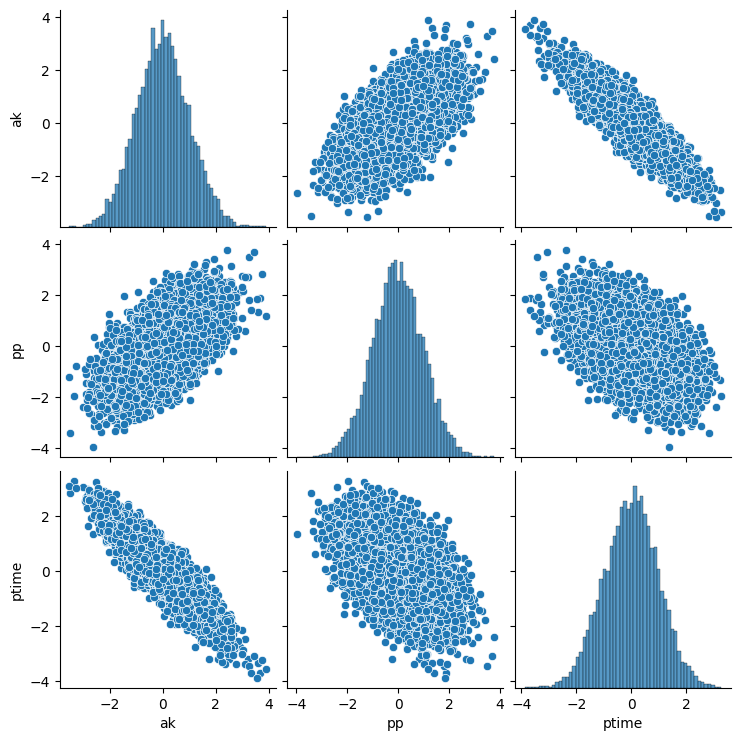

In [36]:
import matplotlib.pyplot as plt
import numpy as mnp
import pandas as mpd
import seaborn as sn
import scipy.stats as sts

Sigma = mnp.array([[1, 0.6, -0.9], [0.6, 1, -0.5], [-0.9, -0.5, 1]])
mean = [0,0,0]
APT = mnp.random.multivariate_normal(mean , Sigma , 10000)
print(mnp.corrcoef(APT , rowvar = False))

mnp.random.seed(1234)
df = mpd.DataFrame(data=APT, columns=["ak", "pp", "ptime"])

sn.pairplot(df)
plt.show()


## Question 1c (20 points)

Perform the probability inrtegral transform and replicate the associated plots.

[[ 1.          0.60090928 -0.9001334 ]
 [ 0.60090928  1.         -0.50293426]
 [-0.9001334  -0.50293426  1.        ]]


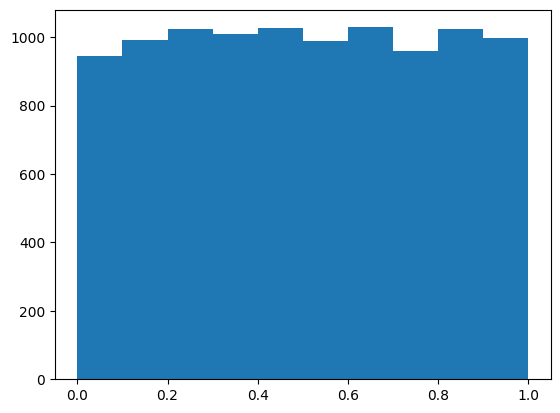

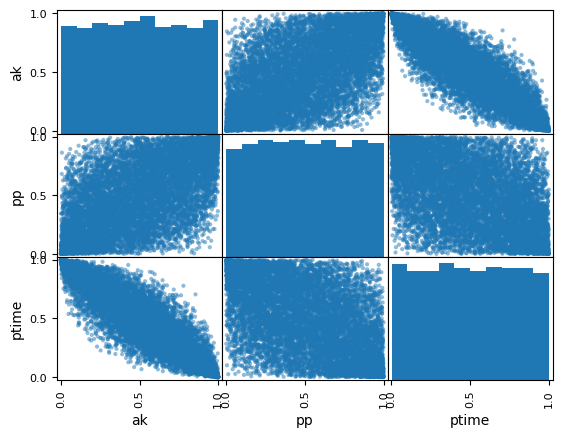

In [41]:
import matplotlib.pyplot as plt
import numpy as mnp
import pandas as mpd
import seaborn as sn
from scipy.stats import norm

Sigma = mnp.array([[1, 0.6, -0.9], [0.6, 1, -0.5], [-0.9, -0.5, 1]])
mean = [0,0,0]
APT = mnp.random.multivariate_normal(mean , Sigma , 10000)
print(mnp.corrcoef(APT , rowvar = False))

U = norm.cdf(APT , 0 , 1)
plt.hist(U[:,1] , bins = 10)
plt.show()
df_U = mpd.DataFrame(data=U, columns=["ak", "pp", "ptime"])
mpd.plotting.scatter_matrix(df_U)
plt.show()

## Question 1d (20 points)

Perform the inverse transform sampling.

In [42]:
import matplotlib.pyplot as plt
import numpy as mnp
import pandas as mpd
import seaborn as sn
import scipy.stats as sts

U = mnp.random.rand(10000, 3)

ak = sts.poisson.ppf(U[:, 0], 5)
pp = sts.poisson.ppf(U[:, 1], 15)
ptime = sts.norm.ppf(U[:, 2], 120, 30)
gs = mnp.random.normal(0, 1, 10000)

## Question 1e (10 points)

Replicate the final plot showcasing the correlations between the variables.


[[ 1.          0.59361579 -0.89879124]
 [ 0.59361579  1.         -0.48846965]
 [-0.89879124 -0.48846965  1.        ]]


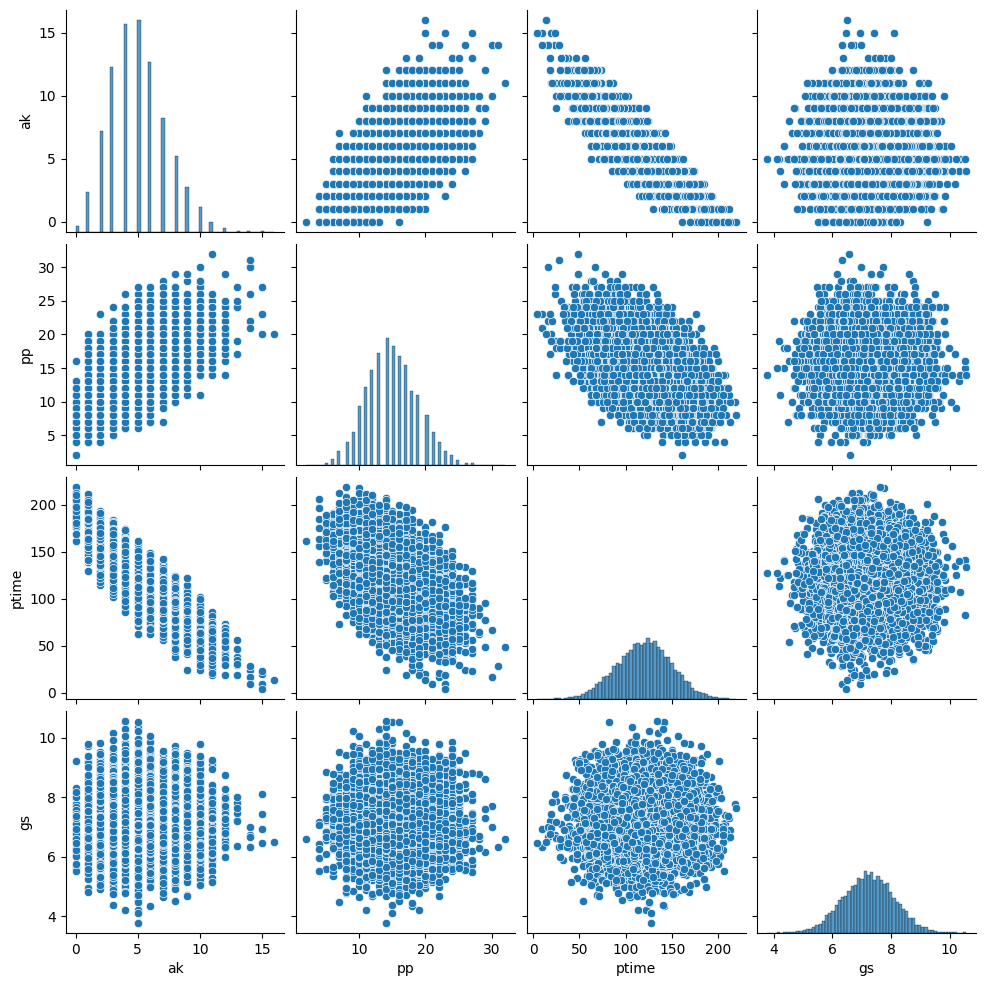

In [5]:
import matplotlib.pyplot as plt
import numpy as mnp
import pandas as mpd
import seaborn as sn
import scipy.stats as sts

Sigma = mnp.array([[1, 0.6, -0.9], [0.6, 1, -0.5], [-0.9, -0.5, 1]])
mean = [0,0,0]
APT = mnp.random.multivariate_normal(mean , Sigma , 10000)
print(mnp.corrcoef(APT , rowvar = False))

data2 = {
    'ak':ak,
    'pp':pp,
    'ptime':ptime,
    'gs':gs
}
df = mpd.DataFrame(data2)
sn.pairplot(df)
plt.show()

## Problem 2 (20 points)

You now pretend that the $n=4$ dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$.

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i=1$ to $i=100$ (15 points)

\begin{equation}
r= \frac{1}{N} \sum_{i=1}^{N} x_i x_i^t
\end{equation}
Where \( x_i \) represents the \( i^(th) \) sample of \( X \).

\section*{Online/Recursive Update Formula}
When a new sample \( x_i \) arrives, the correlation matrix is updated as:
\begin{equation}
r_i = \frac{i - 1}{i} r_{i-1} + \frac{1}{i} x_i x_i^t
\end{equation}
Here, \( r_i \) is the correlation matrix after the \( i^{th} \) sample is observed, \( r_{i-1} \) is the correlation matrix after \( i-1 \) samples have been observed, and \( x_i \) is the \( i^{th} \) sample.

\end{document}

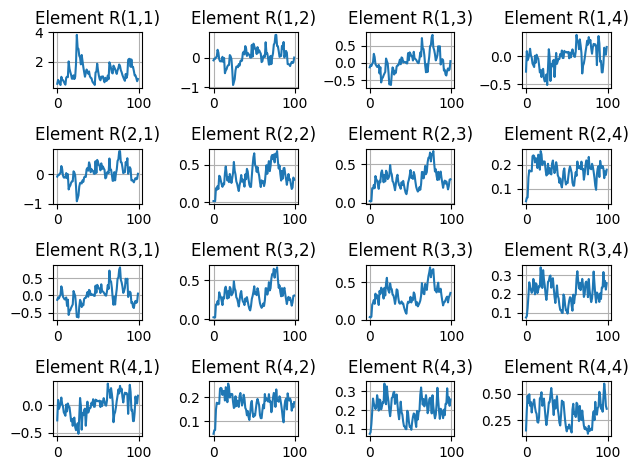

In [44]:
# Extract the transformed variables from df_U
ak_transformed = df_U['ak'].values
pp_transformed = df_U['pp'].values
ptime_transformed = df_U['ptime'].values

# Function to recursively update the correlation matrix
def recursive_update(R_prev, x_i):
    i = len(x_i)
    R_i = ((i - 1) / i) * R_prev + (1 / i) * mnp.outer(x_i, x_i)
    return R_i

# Initialize the correlation matrix
R = mnp.zeros((4, 4))

# Generate the 4-dimensional data (gs, ak_transformed, pp_transformed, ptime_transformed)
data = mnp.column_stack((gs, ak_transformed, pp_transformed, ptime_transformed))

# List to store the elements of the correlation matrix
R_values = []

# Update the correlation matrix for each data point
for i in range(100):
    R = recursive_update(R, data[i])
    R_values.append(R.copy())

# Plot the elements of the correlation matrix
fig, axs = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        axs[i, j].plot([R_values[k][i, j] for k in range(100)])
        axs[i, j].set_title(f'Element R({i+1},{j+1})')
        axs[i, j].grid(True)

plt.tight_layout()
plt.show()
